In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/network_models_sim_params/results'
else:
    path = '/results'

## Erdos Reyni

In [45]:
nw_model = 'ER'
Nsites = 2
resFile = f'resultsNetwork_model_{nw_model}_sim_Nsites_{Nsites}.csv'

N = 500
# pi1, pi2 = 0.1, 0.1
pi1, pi2 = 0.05, 0.05
q1, q2 = 7.0, 10.0
l = 0.3
df = pd.read_csv(path +'/'+ resFile)
df = df.query('N == @N & pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & l == @l')

In [46]:
# get mean field results:
subprocess.call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} -v > sols.dat', shell=True)
sols = []
with open('sols.dat', 'r') as file:
    for line in file.readlines():
        sols_i = [float(f) for f in line.split()]
        sols.append(sols_i)
sol_index=0 if l==0.0  else 1 
fsMF = sols[sol_index]

# get no interaction results
subprocess.call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {(1-l)*pi1} {(1-l)*pi2} {q1} {q2} 0.0 -v > sols.dat', shell=True)
fsL0 = []
with open('sols.dat', 'r') as file:
    for line in file.readlines():
        fsL0 = [float(f) for f in line.split()]

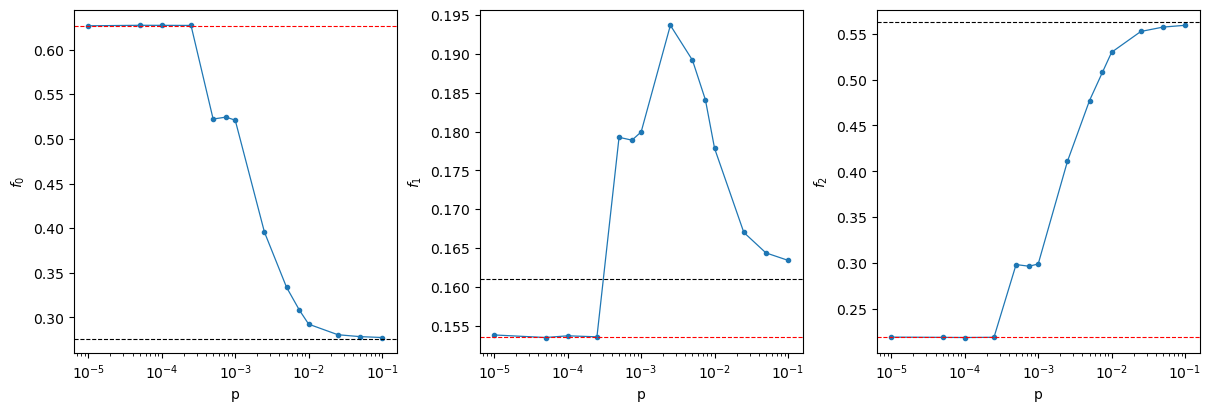

In [47]:
fig, ax = plt.subplots(1,3,figsize=(12,4), constrained_layout=True)

if nw_model == 'ER':
    xlabel = 'p'
    for i in range(3):
        ax[i].set_xscale('log')

for i in range(3):
    ax[i].plot(df['nw_param'], df[f'f{i}'], lw=0.9, marker='.')
    ax[i].axhline(fsMF[i], ls='--', lw=0.8, color='k')
    ax[i].axhline(fsL0[i], ls='--', lw=0.8, color='r')
    ax[i].set(ylabel=f'$f_{i}$', xlabel=xlabel)


### various lambdas

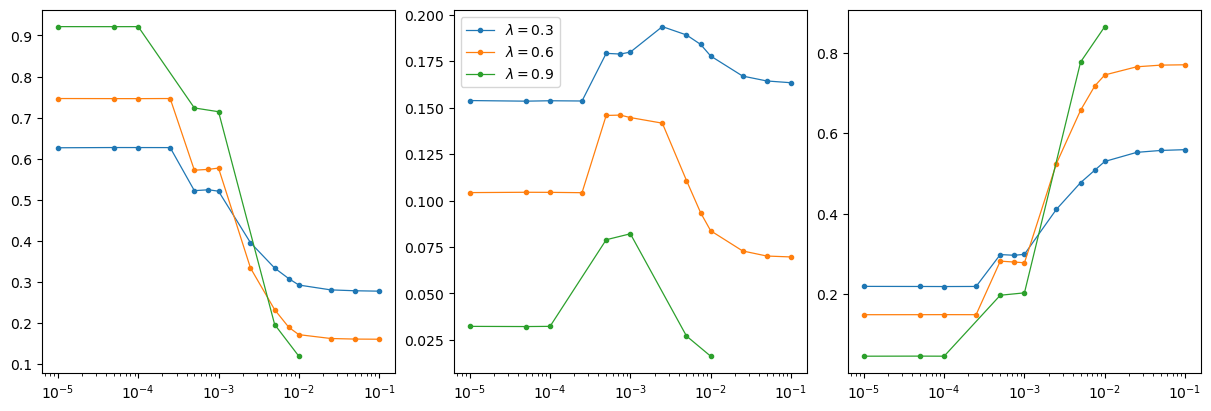

In [52]:
pi1, pi2 = 0.05, 0.05
ls = [0.3, 0.6, 0.9]
q1, q2 = 7.0, 10.0

nw_model = 'ER'
Nsites = 2
resFile = f'resultsNetwork_model_{nw_model}_sim_Nsites_{Nsites}.csv'
df = pd.read_csv(path +'/'+ resFile)
df = df.query('N == @N & pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2')

fig, ax = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
for l in ls:
    dfl = df.query('l == @l')
    for i in range(3):
        label = rf'$\lambda = {l}$' if i == 1 else '_nolabel_'
        ax[i].plot(dfl['nw_param'], dfl[f'f{i}'], lw=0.9, marker='.', label=label)

for i in range(3):
    ax[i].set_xscale('log')
ax[1].legend()


### various pi

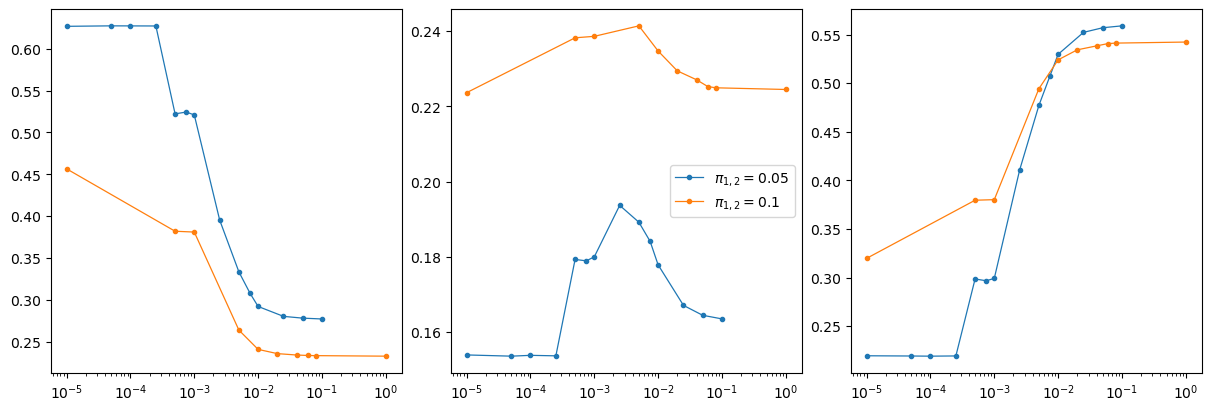

In [54]:
pis = [0.05, 0.1]
l = 0.3
q1, q2 = 7.0, 10.0

nw_model = 'ER'
Nsites = 2
resFile = f'resultsNetwork_model_{nw_model}_sim_Nsites_{Nsites}.csv'
df = pd.read_csv(path +'/'+ resFile)
df = df.query('N == @N & q1 == @q1 & q2 == @q2 & l == @l')

fig, ax = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
for pi in pis:
    dfl = df.query('pi1 == @pi & pi2 == @pi')
    for i in range(3):
        label = rf'$\pi_{{1,2}} = {pi}$' if i == 1 else '_nolabel_'
        ax[i].plot(dfl['nw_param'], dfl[f'f{i}'], lw=0.9, marker='.', label=label)

for i in range(3):
    ax[i].set_xscale('log')
ax[1].legend()


## Barabasi Albert

In [34]:
nw_model = 'BA'
Nsites = 2
resFile = f'resultsNetwork_model_{nw_model}_sim_Nsites_{Nsites}.csv'

N = 500
pi1, pi2 = 0.1, 0.1
q1, q2 = 7.0, 10.0
l = 0.3
df = pd.read_csv(path +'/'+ resFile)
df = df.query('N == @N & pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & l == @l')

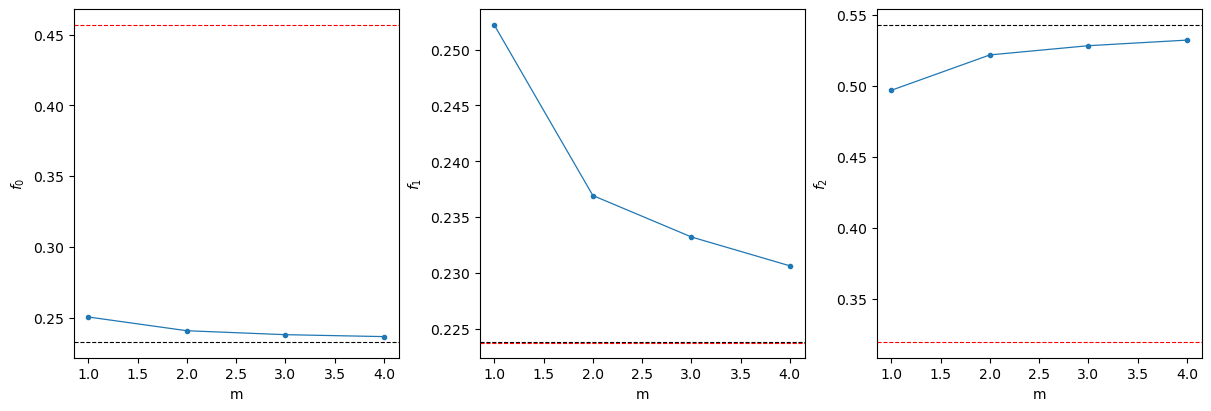

In [35]:
fig, ax = plt.subplots(1,3,figsize=(12,4), constrained_layout=True)

if nw_model == 'BA':
    xlabel = 'm'

for i in range(3):
    ax[i].plot(df['nw_param'], df[f'f{i}'], lw=0.9, marker='.')
    ax[i].axhline(fsMF[i], ls='--', lw=0.8, color='k')
    ax[i].axhline(fsL0[i], ls='--', lw=0.8, color='r')
    ax[i].set(ylabel=f'$f_{i}$', xlabel=xlabel)